In [43]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [44]:
data_dir = "~gbromley/"
mod_data = 'modified/wrfinput_d01'
unmod_data = 'wrfinput_d01'

In [76]:
md.variables

Frozen(OrderedDict([('Times', <xarray.Variable (Time: 1)>
array([b'2015-05-21_00:00:00'], 
      dtype='|S19')), ('XLAT', <xarray.Variable (Time: 1, south_north: 99, west_east: 99)>
array([[[ 39.120686,  39.142097, ...,  39.142097,  39.120686],
        [ 39.282131,  39.303596, ...,  39.303596,  39.282131],
        ..., 
        [ 54.845436,  54.874424, ...,  54.874424,  54.845436],
        [ 55.006008,  55.035088, ...,  55.035088,  55.006008]]], dtype=float32)
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      ), ('XLONG', <xarray.Variable (Time: 1, south_north: 99, west_east: 99)>
array([[[-115.301086, -115.092972, ...,  -94.877014,  -94.668915],
        [-115.329041, -115.120361, ...,  -94.84964 ,  -94.640961],
        ..., 
        [-118.953812, -118.674683, ...,  -91.295319,  -91.016174],
        [-119.004852, -118.724747, ...,  -91.245239,  -90.965149]]], dtype=float32)
Attributes:


In [46]:
md = xr.open_dataset(data_dir+mod_data)
ud = xr.open_dataset(data_dir+unmod_data)

In [47]:
md

<xarray.Dataset>
Dimensions:               (DIM0009: 5, Time: 1, bottom_top: 29, bottom_top_stag: 30, crop_types_stag: 5, land_cat_stag: 21, num_ext_model_couple_dom_stag: 1, snow_layers_stag: 3, snso_layers_stag: 7, soil_cat_stag: 16, soil_layers_stag: 4, south_north: 99, south_north_stag: 100, west_east: 99, west_east_stag: 100)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 39.1207 ...
    XLONG                 (Time, south_north, west_east) float32 -115.301 ...
    XLAT_U                (Time, south_north, west_east_stag) float32 39.1098 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 -115.405 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 39.04 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 -115.287 ...
Dimensions without coordinates: DIM0009, Time, bottom_top, bottom_top_stag, crop_types_stag, land_cat_stag, num_ext_model_couple_dom_stag, snow_layers_stag, snso_layers_st

In [16]:
test = ud['LANDUSEF']-md['LANDUSEF']

In [19]:
md['LANDUSEF']

<xarray.DataArray 'LANDUSEF' (Time: 1, land_cat_stag: 21, south_north: 99, west_east: 99)>
[205821 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 39.1207 39.1421 39.1631 ...
    XLONG    (Time, south_north, west_east) float32 -115.301 -115.093 ...
Dimensions without coordinates: Time, land_cat_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  LANDUSE FRACTION BY CATEGORY
    units:        
    stagger:      Z
    coordinates:  XLONG XLAT XTIME

In [48]:
test = md['LANDUSEF'].sel(land_cat_stag=9)
fallow = md['LANDUSEF'].sel(land_cat_stag=16)

In [49]:
t_sav = test.where(test.values > 0.3)-0.4

In [50]:
t_fal = fallow.where(test.values > 0.3)+0.4

In [51]:
md['LANDUSEF'][0,9,:,:]=t_sav

In [52]:
md['LANDUSEF'][0,16,:,:]=t_fal

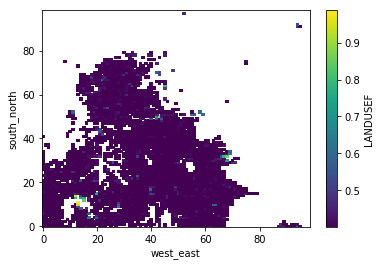

In [53]:
md['LANDUSEF'].sel(land_cat_stag=16).plot()

In [55]:
md.to_netcdf('modified_wrf_input.nc')

ValueError: cannot serialize coordinates because variable FSA already has an attribute 'coordinates'

In [40]:
 testing = md['LANDUSEF'] - ud['LANDUSEF']

In [70]:
test = md['MAPFAC_U'].attrs

In [71]:
test.popitem()

('stagger', 'X')

In [73]:
md['MAPFAC_U'].attrs = test

In [66]:
md['FSA'].attrs

OrderedDict([('FieldType', 104),
             ('MemoryOrder', 'XY '),
             ('description', 'total absorbed solar radiation'),
             ('units', 'W/m2'),
             ('stagger', '')])

In [69]:
md['MAPFAC_U'].attrs = md['MAPFAC_U'].attrs.popitem()

ValueError: too many values to unpack (expected 2)

In [74]:
md.to_netcdf('modified_wrf_input.nc')

ValueError: cannot serialize coordinates because variable SNOALB already has an attribute 'coordinates'